In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
data_Pulchowk = pd.read_csv('.\\Data\\pulchowk,-kathmandu-air-quality.csv')

In [159]:
data_Pulchowk.isna().sum(axis=0)

date    0
pm25    0
pm10    0
dtype: int64

In [160]:
data_Pulchowk['date'] =pd.to_datetime(data_Pulchowk['date'])

In [161]:
display(data_Pulchowk)

,date,pm25,pm10
0,2024-05-01,104,49
1,2024-05-02,102,55
2,2024-05-03,131,48
3,2024-05-04,120,53
4,2024-05-05,114,51
...,...,...,...
764,2017-05-08,,22
765,2017-01-12,,57
766,2017-02-06,,47
767,2016-12-02,,53


In [162]:
print(data_Pulchowk.get('pm25'))

0      104
1      102
2      131
3      120
4      114
      ... 
764       
765       
766       
767       
768       
Name: pm25, Length: 769, dtype: object


In [163]:
data_Pulchowk.pm25 = pd.to_numeric(data_Pulchowk.pm25, errors='coerce')

<Axes: xlabel='date'>

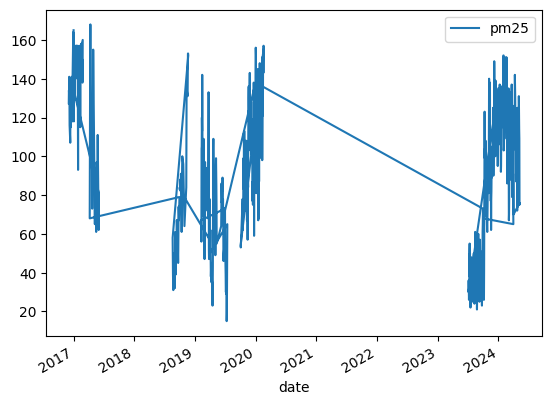

In [164]:
data_Pulchowk.plot(x='date',y='pm25')

In [165]:
data_Pulchowk['pm25']=data_Pulchowk['pm25'].replace(to_replace=' ',value=np.nan)

In [166]:
data_Pulchowk.isna().sum(axis=0)

date     0
pm25    38
pm10     0
dtype: int64

In [167]:
data_Pulchowk = data_Pulchowk.drop(data_Pulchowk[data_Pulchowk.pm25.isna()].index)

<Axes: xlabel='date'>

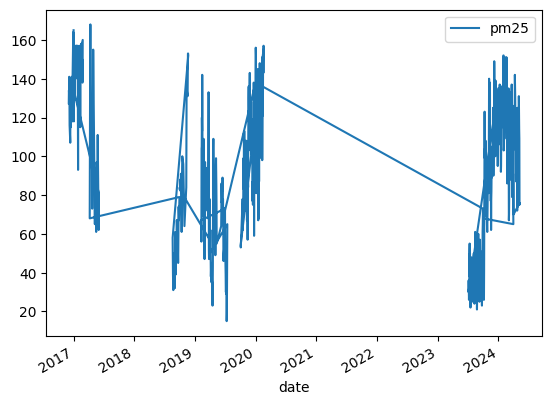

In [168]:
data_Pulchowk.plot(x='date',y='pm25')

In [169]:
data_Pulchowk.isna().sum(axis=0)

date    0
pm25    0
pm10    0
dtype: int64

In [170]:
from prophet import Prophet

In [171]:
model = Prophet()

train_data=pd.DataFrame()
train_data['ds']=data_Pulchowk['date']
train_data['y']=data_Pulchowk['pm25']

In [172]:
model.fit(train_data)

15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:29 - cmdstanpy - INFO - Chain [1] done processing


In [173]:
future=model.make_future_dataframe(periods=7)
future.tail()

,ds
733,2024-05-11
734,2024-05-12
735,2024-05-13
736,2024-05-14
737,2024-05-15


In [174]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
733,2024-05-11,87.413850,56.348010,103.181255,87.413850,87.413850,-9.613489,-9.613489,-9.613489,-2.652819,-2.652819,-2.652819,-6.960669,-6.960669,-6.960669,0.0,0.0,0.0,77.800361
734,2024-05-12,87.422709,54.404015,103.665145,87.422709,87.422709,-8.477784,-8.477784,-8.477784,0.406027,0.406027,0.406027,-8.883811,-8.883811,-8.883811,0.0,0.0,0.0,78.944925
735,2024-05-13,87.431567,53.687480,101.306748,87.431567,87.431567,-9.983081,-9.983081,-9.983081,0.759601,0.759601,0.759601,-10.742682,-10.742682,-10.742682,0.0,0.0,0.0,77.448487
736,2024-05-14,87.440426,53.815590,99.081527,87.440426,87.440426,-11.047442,-11.047442,-11.047442,1.457173,1.457173,1.457173,-12.504616,-12.504616,-12.504616,0.0,0.0,0.0,76.392984
737,2024-05-15,87.449285,49.049996,98.633506,87.449285,87.449285,-12.909737,-12.909737,-12.909737,1.228920,1.228920,1.228920,-14.138657,-14.138657,-14.138657,0.0,0.0,0.0,74.539548


c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

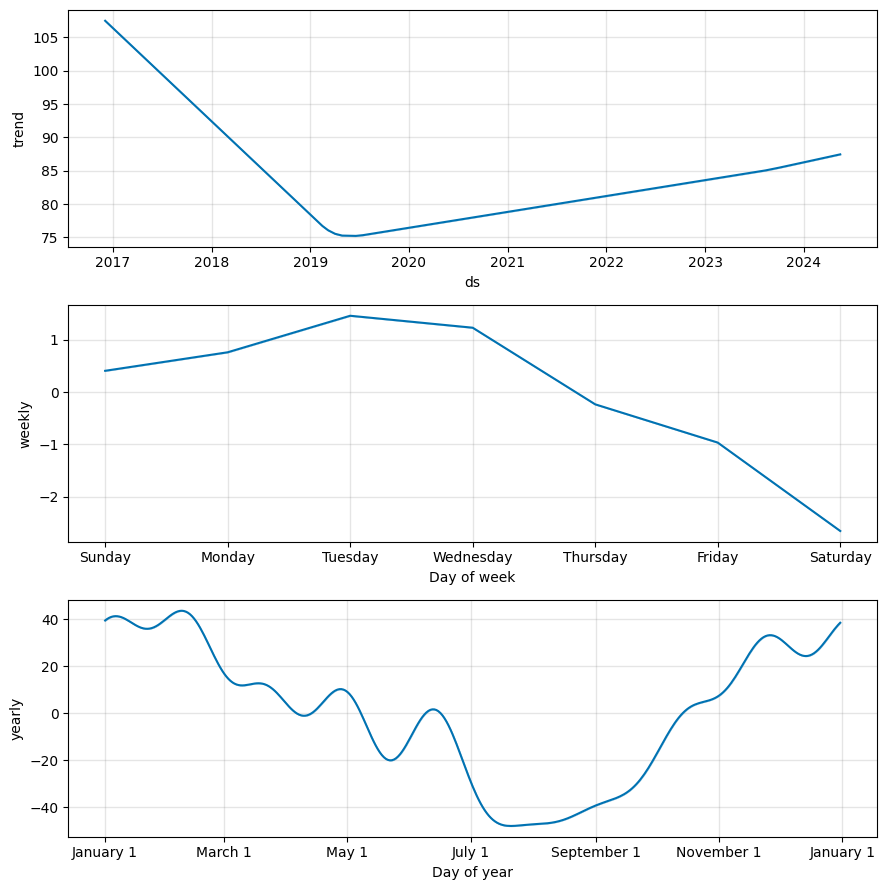

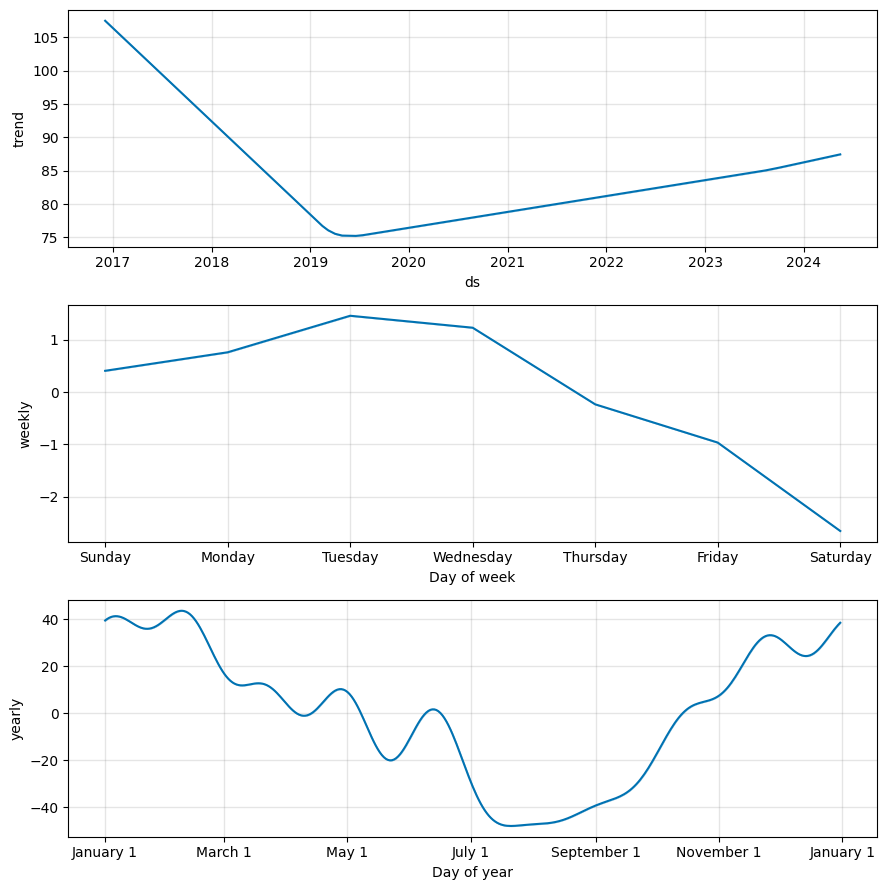

In [175]:
model.plot_components(forecast)